In [1]:
import os, sys
os.environ["MALLOC_TRIM_THRESHOLD_"] = '0'
import numpy as np
import h5netcdf

import xarray as xr
import xarray.ufuncs as xu
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib import colors
import cartopy.crs as ccrs
import cartopy

plt.rc("figure", figsize=(16,4))
plt.rc("font", size=14)
ccrs.PlateCarree()

from dask.distributed import Client, LocalCluster
cluster = LocalCluster(processes=False, n_workers=1, threads_per_worker=4, protocol ='tcp')
client = Client(cluster)
client

/home/durandy/miniconda3/envs/towel/lib/python3.9/site-packages/distributed/node.py:160: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 45945 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:45945/status,
Dashboard: http://127.0.0.1:45945/status,Workers: 1
Total threads: 4,Total memory: 78.61 GiB
Status: running,Using processes: False
Comm: tcp://127.0.0.1:44157,Workers: 1
Dashboard: http://127.0.0.1:45945/status,Total threads: 4
Started: Just now,Total memory: 78.61 GiB
Comm: tcp://127.0.0.1:40229,Total threads: 4
Dashboard: http://127.0.0.1:49135/status,Memory: 78.61 GiB
Nanny: None,


In [2]:
indir_anom = '/cnrm/tropics/commun/DATACOMMUN/WAVE/NO_SAVE/DATA/RAW_ANOMALY/TCWV/'

datasets = []
datasets_T = []
datasets_T_B = []

year = np.arange(2015,2016)
for y in year :
    ds = xr.open_mfdataset(indir_anom + '*' + str(y) + '.nc', chunks = {'time' : 1})
    ds_T = xr.open_mfdataset(indir_anom + '*' + str(y) + '*TOUCAN_without_biais.nc', chunks = {'time' : 1})
    ds_T_B = xr.open_mfdataset(indir_anom + '*' + str(y) + '*TOUCAN.nc', chunks = {'time' : 1})

    ds = ds.sel(latitude = slice(20,-20))
    ds_T = ds_T.sel(latitude = slice(20,-20))
    ds_T_B = ds_T_B.sel(latitude = slice(20,-20))


    datasets.append(ds)
    datasets_T.append(ds_T)
    datasets_T_B.append(ds_T_B)

ds = xr.concat(datasets, dim = 'time')
ds_T = xr.concat(datasets_T, dim = 'time')
ds_T_B = xr.concat(datasets_T_B, dim = 'time')

da = ds['tcwv_ano'].compute()
da_T = ds_T['tcwv_ano'].compute()
da_T_B = ds_T_B['tcwv_ano'].compute()

std = xr.open_mfdataset(indir_anom + '/MEAN/ds_anom_std_Y_PTOUCAN_C30.nc')
std_B = xr.open_mfdataset(indir_anom + '/MEAN/ds_anom_std_Y_TOUCAN.nc')



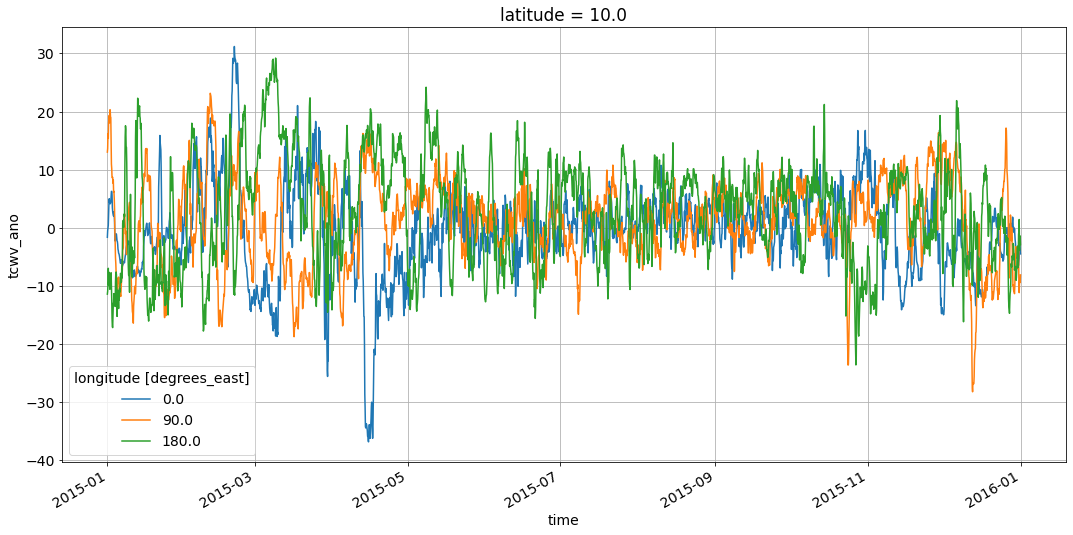

In [3]:
plt.rc("figure", figsize=(18,8))

latitude = 10
longitude = [0, 90, 180]

plt.figure()
da.sel(latitude = latitude, longitude = longitude).plot(hue='longitude')
# ds_smot_T_5h['tcwv_smooth'].sel(latitude = latitude, longitude = longitude).plot(hue='longitude')
plt.grid()
# plt.legend()
plt.show()

# Californie

# Comparaison des anomalies entre la climatologie sur 30 ans et celle de TOUCAN avec le biais

In [3]:
std = xr.open_mfdataset(indir_anom + '/MEAN/ds_anom_std_Y_PTOUCAN_C30.nc')
std = std.expand_dims(time = da.time)
std_B = xr.open_mfdataset(indir_anom + '/MEAN/ds_anom_std_Y_TOUCAN.nc')
std_B = std_B.expand_dims(time = da.time)

std_n = -std
std_B_n = -std_B
std

<xarray.Dataset>
Dimensions:    (latitude: 321, longitude: 1440, time: 2920)
Coordinates:
  * time       (time) datetime64[ns] 2015-01-01 ... 2015-12-31T21:00:00
  * latitude   (latitude) float32 40.0 39.75 39.5 39.25 ... -39.5 -39.75 -40.0
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
Data variables:
    tcwv_ano   (time, latitude, longitude) float64 dask.array<chunksize=(2920, 321, 1440), meta=np.ndarray>

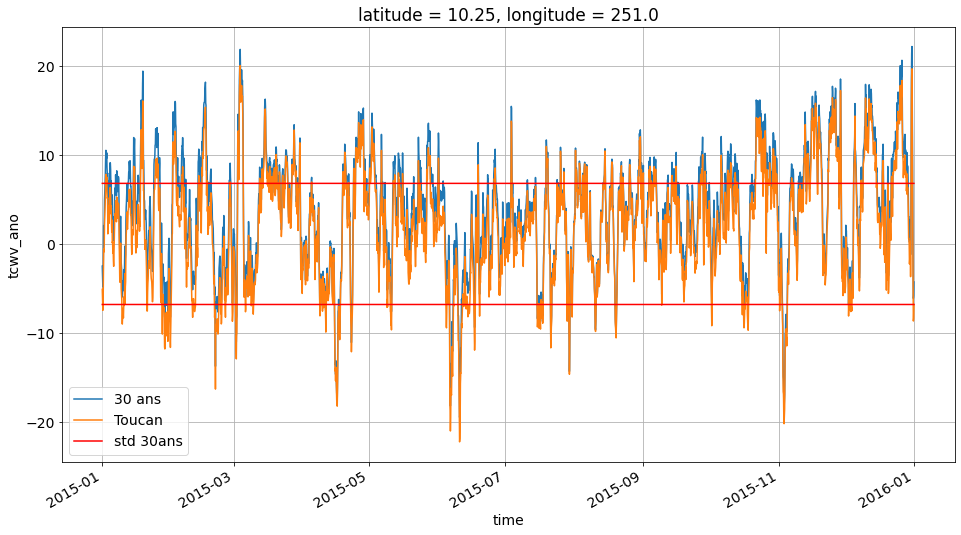

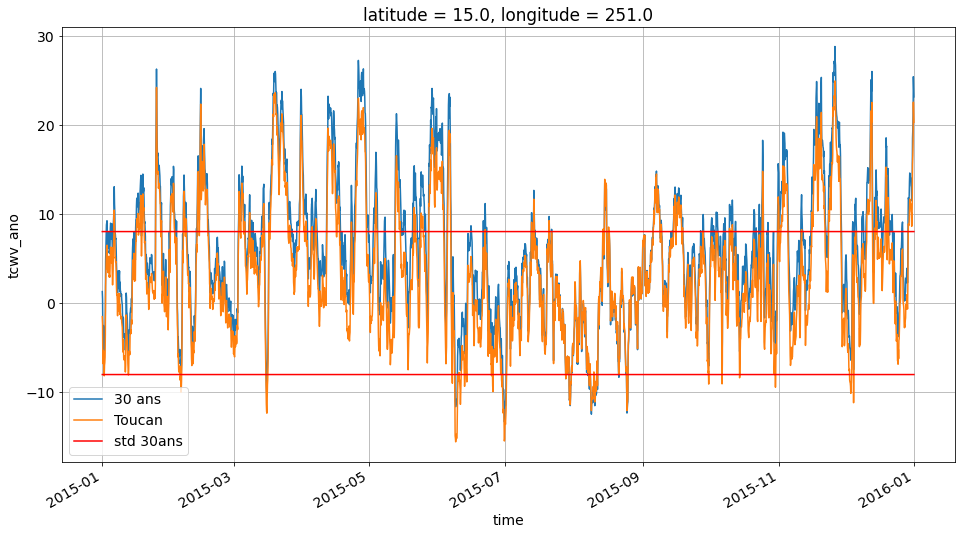

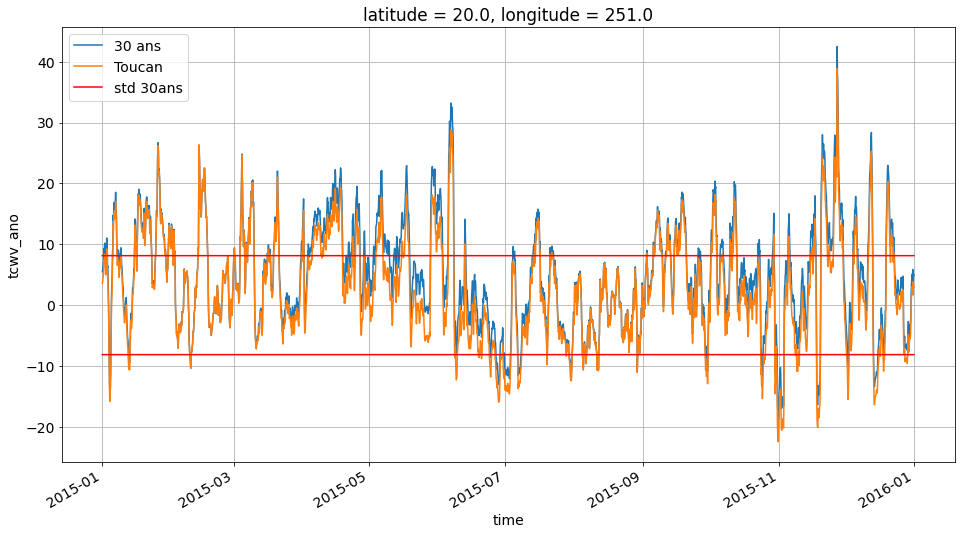

In [4]:
latitude = [10.3, 15, 20]
longitude = 251



for i in latitude :

    plt.figure(figsize=(16,8))
    da.sel(latitude = i, longitude = longitude, method = 'nearest').plot(label = '30 ans')
    da_T_B.sel(latitude = i, longitude = longitude, method = 'nearest').plot(label = 'Toucan')
    std['tcwv_ano'].sel(latitude = i, longitude = longitude, method = 'nearest').plot(label = 'std 30ans', color = 'red')
    std_n['tcwv_ano'].sel(latitude = i, longitude = longitude, method = 'nearest').plot(color = 'red')
    # ds_smot_T_5h['tcwv_smooth'].sel(latitude = latitude, longitude = longitude).plot(hue='longitude')
    plt.grid()
    plt.legend()
    plt.show()

# Comparaison des anomalies entre la climatologie sur 30 ans et celle de TOUCAN sans biais

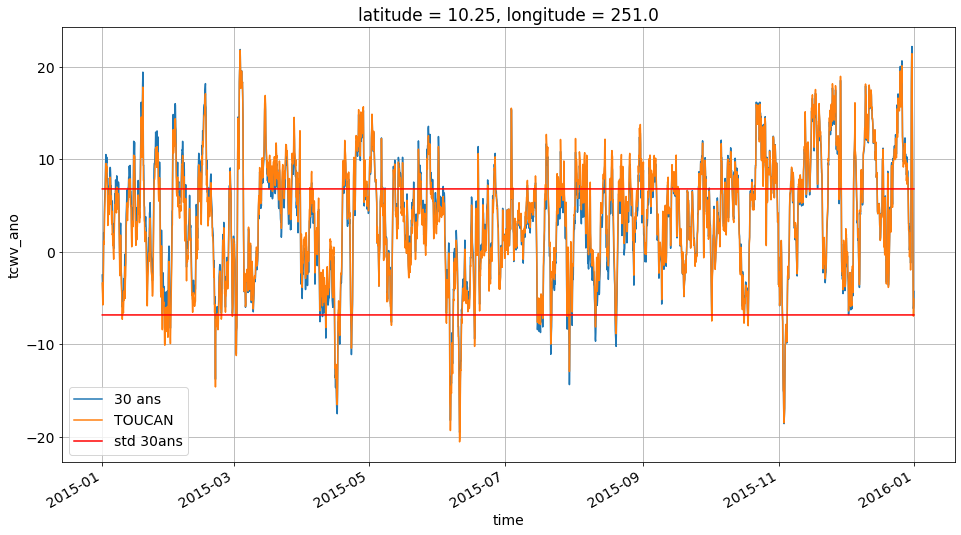

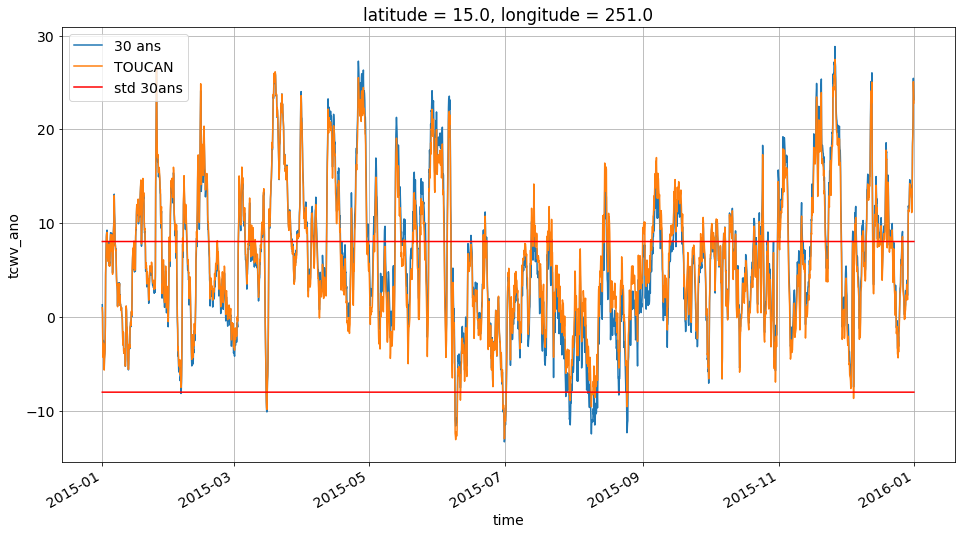

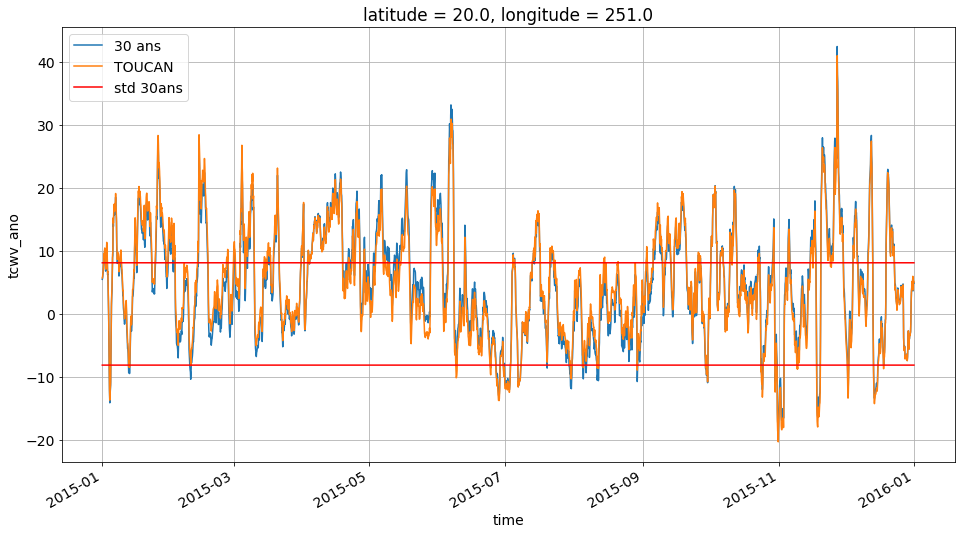

In [5]:
latitude = [10.3, 15, 20]
longitude = 251

for i in latitude :

    plt.figure(figsize=(16,8))
    da.sel(latitude = i, longitude = longitude, method = 'nearest').plot(label = '30 ans')
    da_T.sel(latitude = i, longitude = longitude, method = 'nearest').plot(label = 'TOUCAN')
    std['tcwv_ano'].sel(latitude = i, longitude = longitude, method = 'nearest').plot(label = 'std 30ans', color = 'red')
    std_n['tcwv_ano'].sel(latitude = i, longitude = longitude, method = 'nearest').plot(color = 'red')
    # ds_smot_T_5h['tcwv_smooth'].sel(latitude = latitude, longitude = longitude).plot(hue='longitude')
    plt.grid()
    plt.legend()
    plt.show()

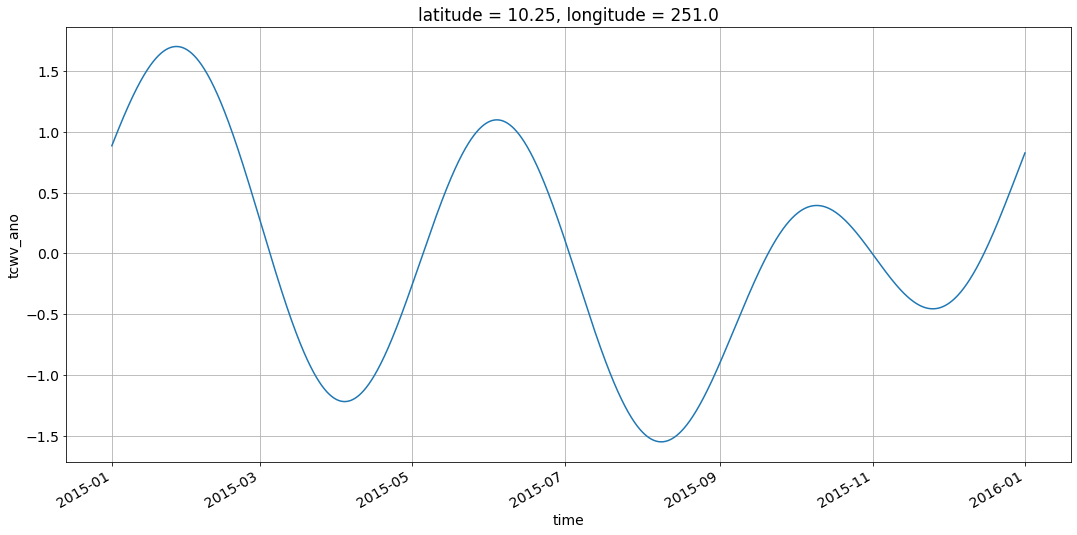

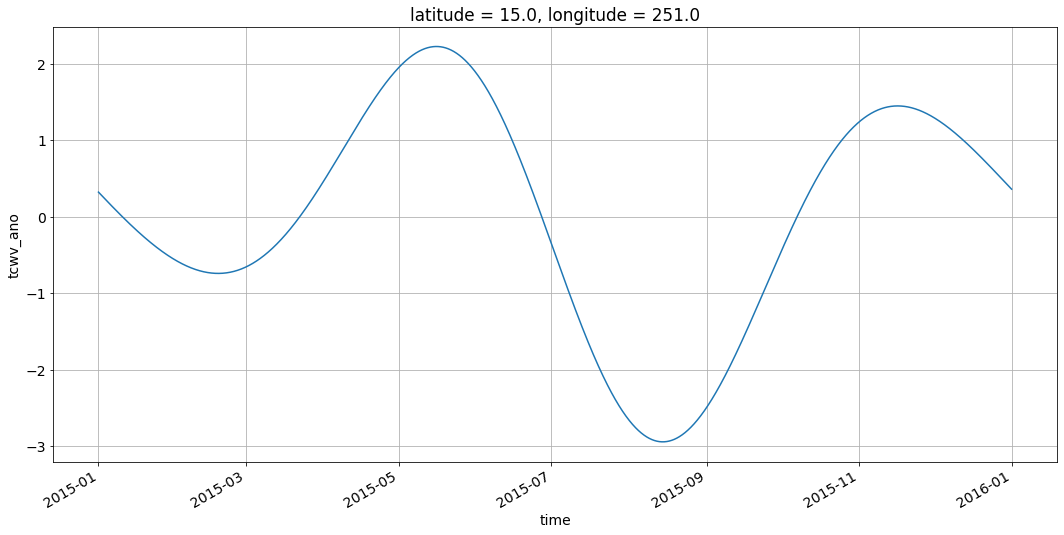

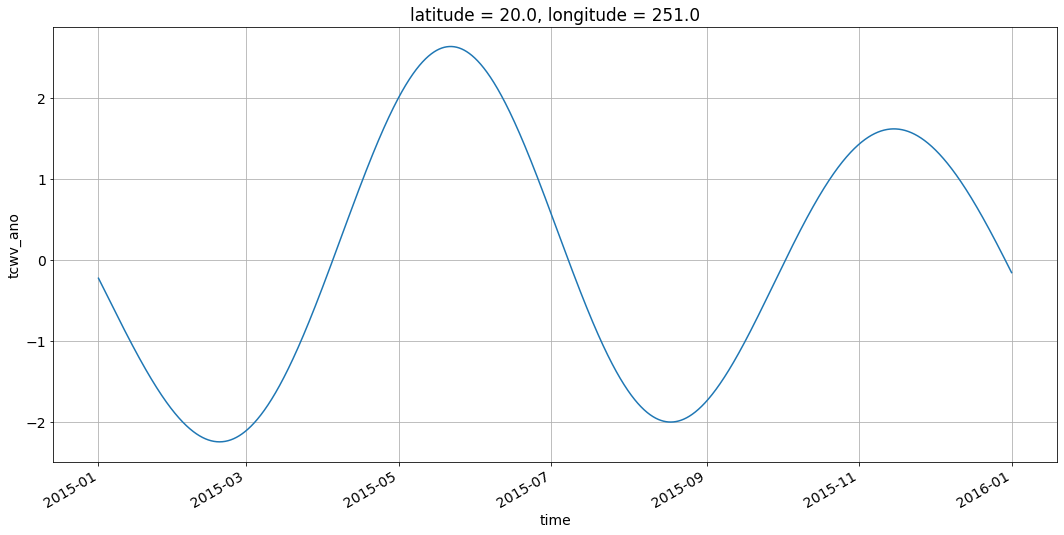

In [6]:
latitude = [10.3, 15, 20]
longitude = 251

for i in latitude :
    _da = da.sel(latitude = i, longitude = longitude, method = 'nearest')
    _da_T = da_T.sel(latitude = i, longitude = longitude, method = 'nearest')

    diff = _da - _da_T
    
    plt.figure()
    diff.plot(hue='longitude')
#     da_T.sel(latitude = latitude, longitude = i).plot(hue='longitude')

    # ds_smot_T_5h['tcwv_smooth'].sel(latitude = latitude, longitude = longitude).plot(hue='longitude')
    plt.grid()
    # plt.legend()
    plt.show()

# Australie

# Comparaison des anomalies entre la climatologie sur 30 ans et celle de TOUCAN avec le biais

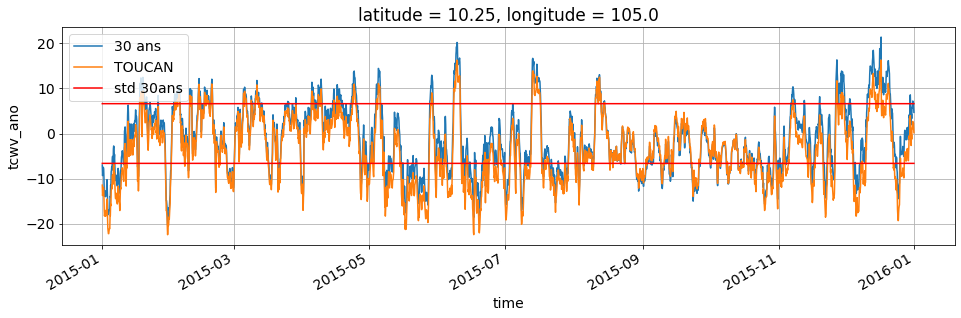

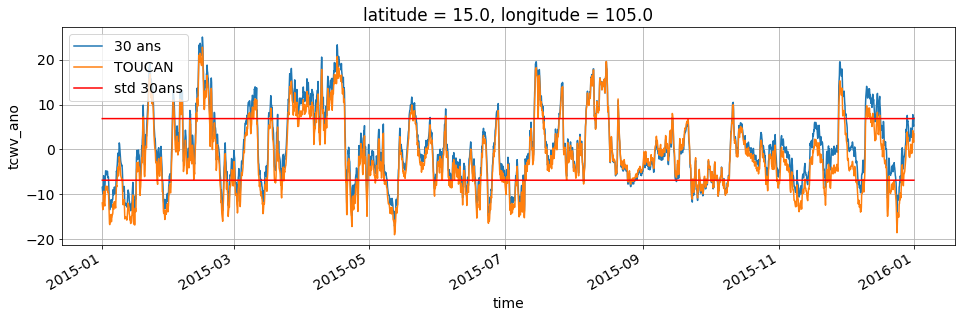

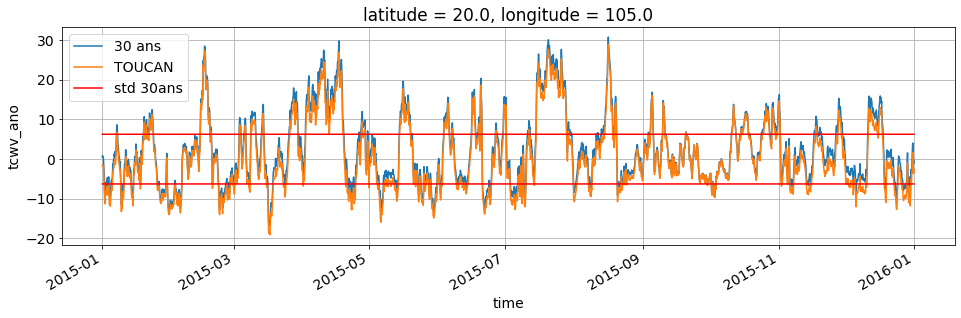

In [6]:
latitude = [10.3, 15, 20]
longitude = 105

for i in latitude :

    plt.figure()
    da.sel(latitude = -i, longitude = longitude, method = "nearest").plot(label = '30 ans')
    da_T_B.sel(latitude = -i, longitude = longitude, method = "nearest").plot(label = 'TOUCAN')
    std['tcwv_ano'].sel(latitude = i, longitude = longitude, method = 'nearest').plot(label = 'std 30ans', color = 'red')
    std_n['tcwv_ano'].sel(latitude = i, longitude = longitude, method = 'nearest').plot(color = 'red')
    # ds_smot_T_5h['tcwv_smooth'].sel(latitude = latitude, longitude = longitude).plot(hue='longitude')
    plt.grid()
    plt.legend()
    plt.show()

# Comparaison des anomalies entre la climatologie sur 30 ans et celle de TOUCAN sans biais

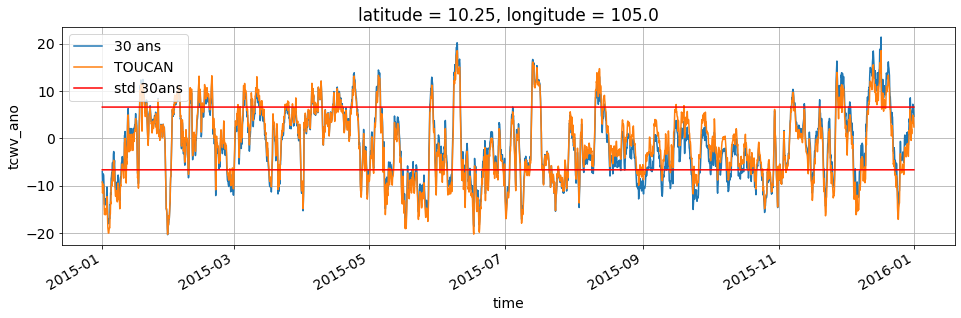

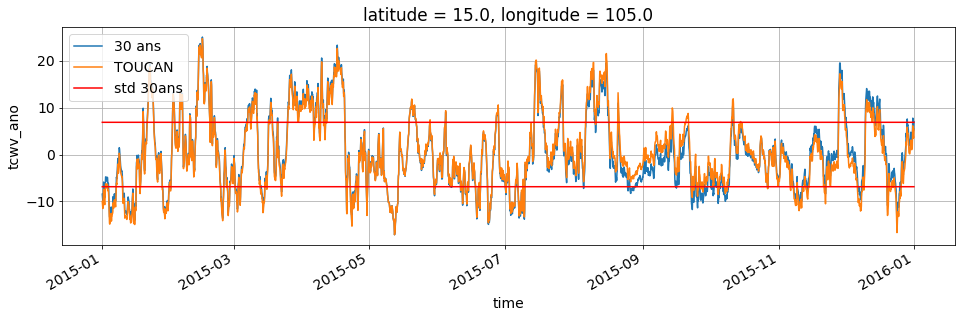

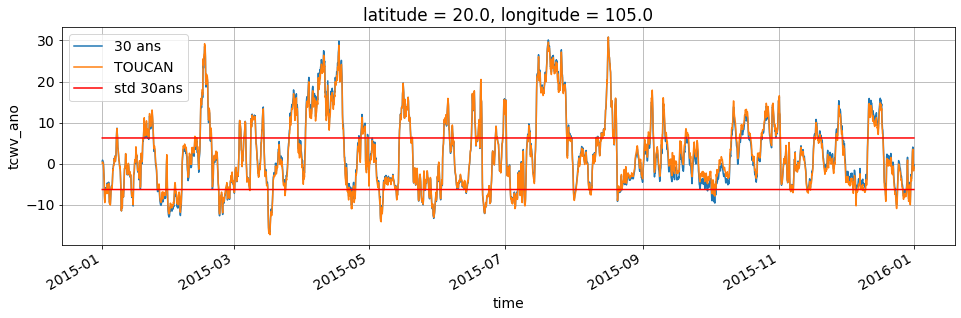

In [7]:
latitude = [10.3, 15, 20]
longitude = 105

for i in latitude :

    plt.figure()
    da.sel(latitude = -i, longitude = longitude, method = "nearest").plot(label = '30 ans')
    da_T.sel(latitude = -i, longitude = longitude, method = "nearest").plot(label = 'TOUCAN')
    std['tcwv_ano'].sel(latitude = i, longitude = longitude, method = 'nearest').plot(label = 'std 30ans', color = 'red')
    std_n['tcwv_ano'].sel(latitude = i, longitude = longitude, method = 'nearest').plot(color = 'red')
    # ds_smot_T_5h['tcwv_smooth'].sel(latitude = latitude, longitude = longitude).plot(hue='longitude')
    plt.grid()
    plt.legend()
    plt.show()

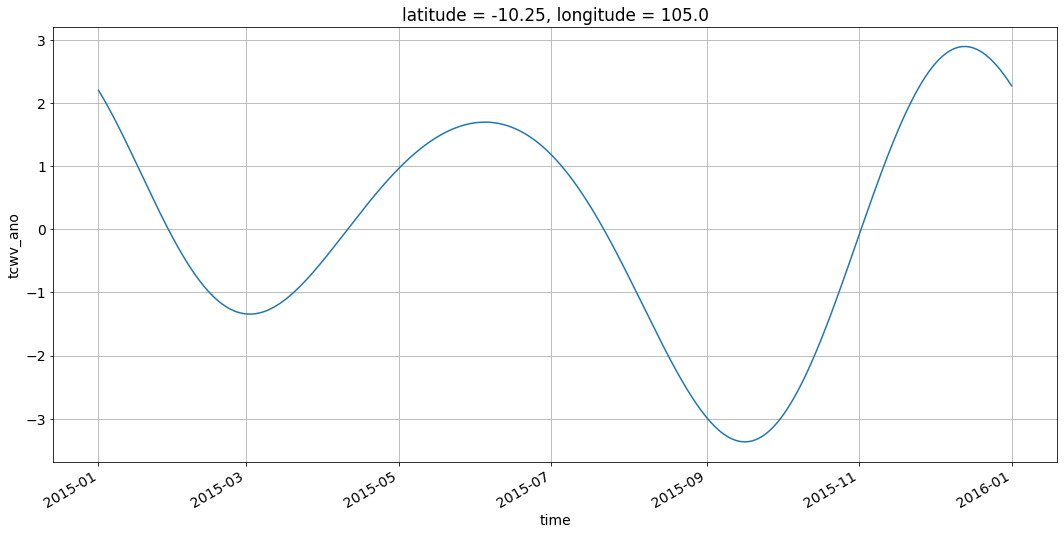

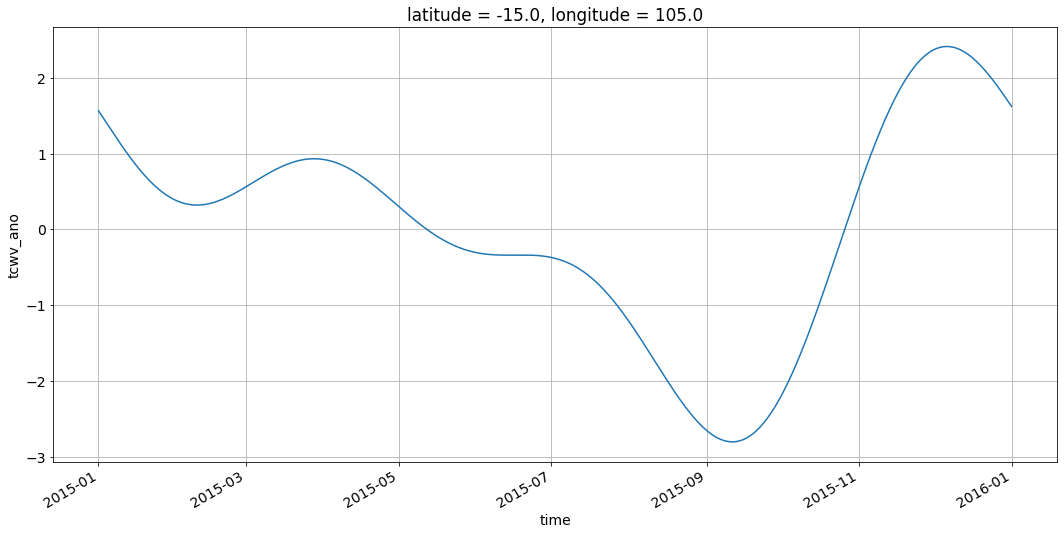

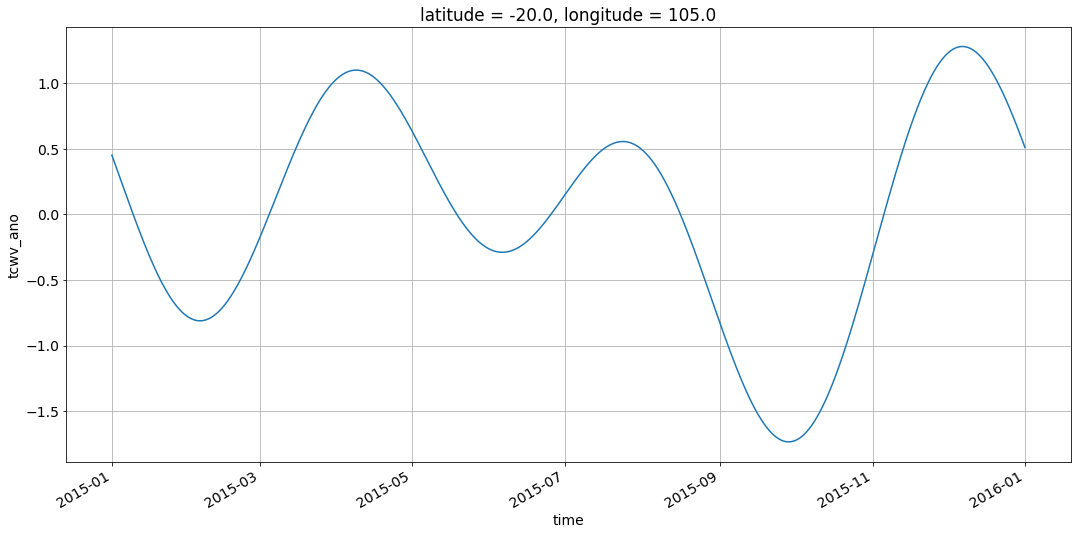

In [9]:
latitude = [10.3, 15, 20]
longitude = 105

for i in latitude :

    plt.figure()
    (da.sel(latitude = -i, longitude = longitude, method = "nearest")-
     da_T.sel(latitude = -i, longitude = longitude, method = "nearest")).plot(hue='longitude')

    # ds_smot_T_5h['tcwv_smooth'].sel(latitude = latitude, longitude = longitude).plot(hue='longitude')
    plt.grid()
    # plt.legend()
    plt.show()

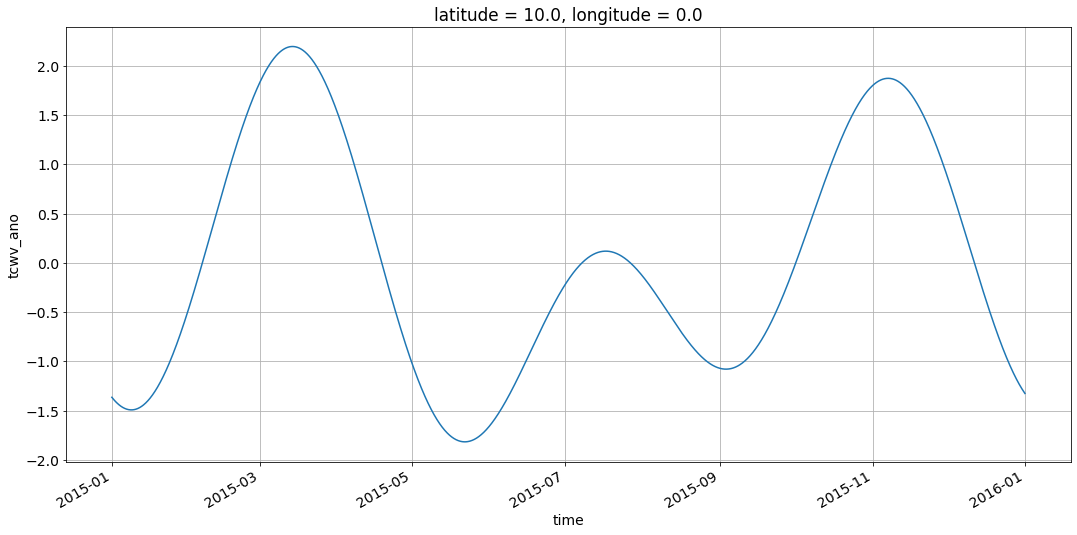

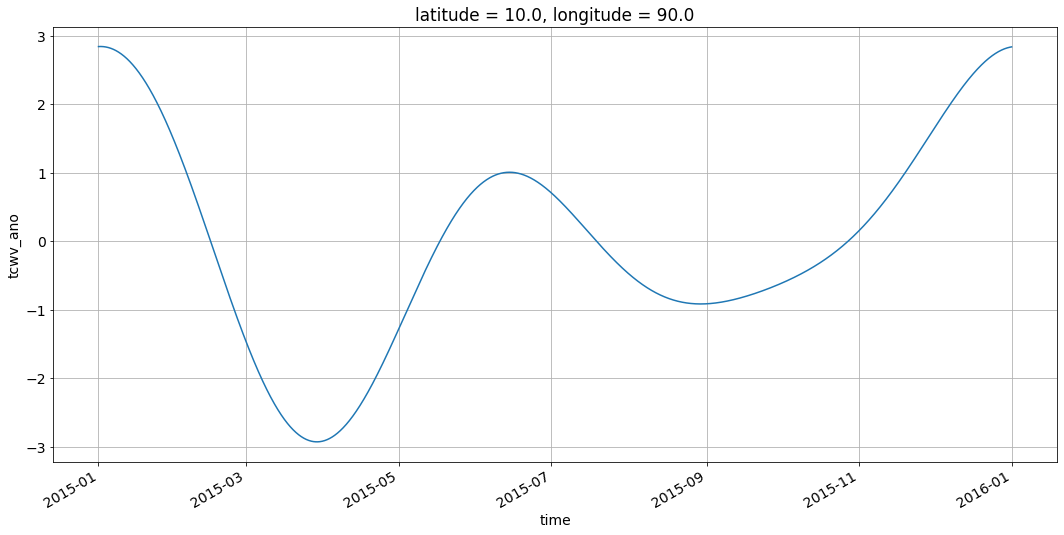

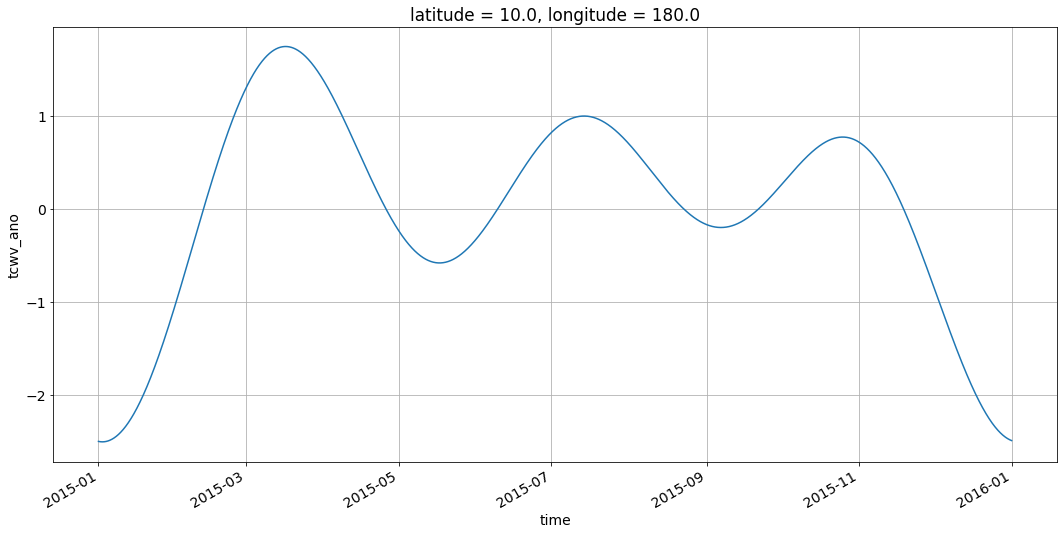

In [10]:
latitude = 10
longitude = [0, 90, 180]

for i in longitude :
    _da = da.sel(latitude = latitude, longitude = i)
    _da_T = da_T.sel(latitude = latitude, longitude = i)

    diff = _da - _da_T
    
    plt.figure()
    diff.plot(hue='longitude')
#     da_T.sel(latitude = latitude, longitude = i).plot(hue='longitude')

    # ds_smot_T_5h['tcwv_smooth'].sel(latitude = latitude, longitude = longitude).plot(hue='longitude')
    plt.grid()
    # plt.legend()
    plt.show()